In [144]:
import pandas as pd

input_files = []
df = pd.read_csv('conf.csv')
print(df.columns)

Index(['Unnamed: 0', 'submitTime', 'startTime', 'finishTime', 'queueTime',
       'runTime', 'jobid', 'query', 'outputdir', 'workflow', 'scratchdir',
       'sessionid', 'query.id', 'local.scratchdir', 'user.name', 'job',
       'inputdir'],
      dtype='object')


In [72]:
# prepare inputs
for index, row in df.iterrows():
    inputs = row['inputdir'].replace('[', '').replace(']', '').split(',')
    for x in inputs:
        input_files.append(x)

dfi = pd.DataFrame()
print('Total number of accesses:', len(input_files),  )

Total number of accesses: 2640679


In [135]:
import datetime

df['submitTime'] = df['submitTime'].astype('int64') 
df['DateTime'] = [datetime.datetime.fromtimestamp(d) for d in df["submitTimeSec"]]
df['Date'] = [datetime.datetime.date(d) for d in df['DateTime']] 
df['Hour'] = [d.hour for d in df['DateTime']]
df['Min'] = [d.minute for d in df['DateTime']]
df['Sec'] = [d.second for d in df['DateTime']]

print('Maximum runtime:', df['runTime'].max()//(3600*1000), 'hour, Minimum runtime:' , df['runTime'].min()//1000, 'sec')
print('Maximum queueTime:', df['queueTime'].max()//(60*1000), 'min, Minimum queueTime:' , df['queueTime'].min()//1000, 'sec')


Maximum runtime: 7 hour, Minimum runtime: 1 sec
Maximum queueTime: 61 min, Minimum queueTime: 3 sec


In [132]:
df1 = df.groupby(['Date', 'Hour']).size().reset_index(name='counts')
hours = df1.index.values
submit_per_hour = df1['counts'].values

df2 = df.groupby(['Date', 'Hour', 'Min', 'Sec']).size().reset_index(name='counts')
secs = df2.index.values
submit_per_sec = df2['counts'].values

print(df.groupby(['Date']).size().reset_index(name='counts'))


         Date  counts
0  2018-08-12   12792
1  2018-08-13   13812
2  2018-08-14   15490
3  2018-08-15   15478
4  2018-08-16   13431
5  2018-08-17   13944
6  2018-08-18   12135
7  2018-08-19    1645


2 1248


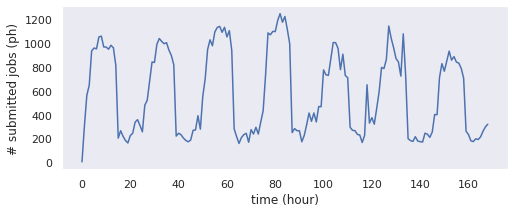

In [143]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker    

# Data for plotting
t = hours
s = submit_per_hour
fig, ax = plt.subplots(figsize= (8, 3))
ax.grid(False)

print(min(s), max(s))
min_t = int(min(t))
ax.plot(t, s)

ax.set(xlabel='time (hour)', ylabel='# submitted jobs (ph)')
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))

#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)

plt.locator_params(axis='x', nbins=10)

plt.savefig('jobsubmission_ph.pdf', format='pdf', dpi=200)
plt.savefig('jobsubmission_ph.png', format='png', dpi=200)

plt.show()

1 11


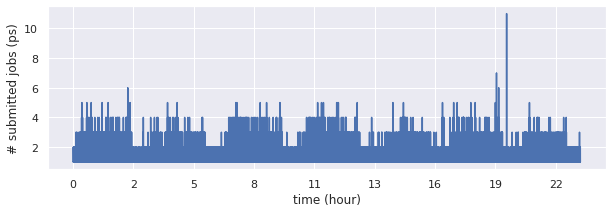

In [138]:
def format_xticks(x, pos=None):
    return str(int(x))

# Data for plotting
t = secs
s = submit_per_sec
fig, ax = plt.subplots(figsize= (8, 3))
print(min(s), max(s))
min_t = int(min(t))
ax.plot(t, s)

ax.set(xlabel='time (hour)', ylabel='# submitted jobs (ps)')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))

#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)

plt.locator_params(axis='x', nbins=10)

plt.savefig('jobsubmission_ps.pdf', format='pdf', dpi=200)
plt.savefig('jobsubmission_ps.png', format='png', dpi=200)

plt.show()